# Preparación de los datos previo al entrenamiento

En este notebook se muestra un proceso EDA de manera sucinta para familiarizarnos con los datos que se usarán para el entrenamiento. Para dicho fin, iniciaremos con la lógica detrás de la elección del conjunto de datos en cuestión.

Elegimos el dataset  Kaggle: Credit Card Fraud Detection dataset.
La razón detrás de esta decisión se basa principalmente en los siguientes puntos:

1. Focus on the Core Task: The data is pre-processed and clean. This is a 1-2 day assignment. You must spend your time on modeling and XAI, not on data cleaning. Using this dataset signals that you understand how to prioritize.

2. Addresses a Key Challenge (Imbalance): The dataset is highly imbalanced. This is not a bug; it's a feature. It forces you to address a critical, real-world problem in fraud detection and discuss it in your report.

3. Perfect for the Chosen Models: A RandomForestClassifier will perform very well on this tabular, anonymized data.
Creates a Realistic XAI Challenge: The anonymized features (V1, V2...) force you to separate the technical explanation from the business narrative. This is a senior-level concept. You will perform the technical explanation and then, in your report, you will discuss how you would translate these findings into business terms if you knew what V14 or V17 actually represented. This shows immense maturity.

In [1]:
# =============================================================================
# 1. SETUP AND IMPORTS
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

# Set some visualization styles
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

Data loaded successfully!
Dataset shape: (284807, 31)

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0

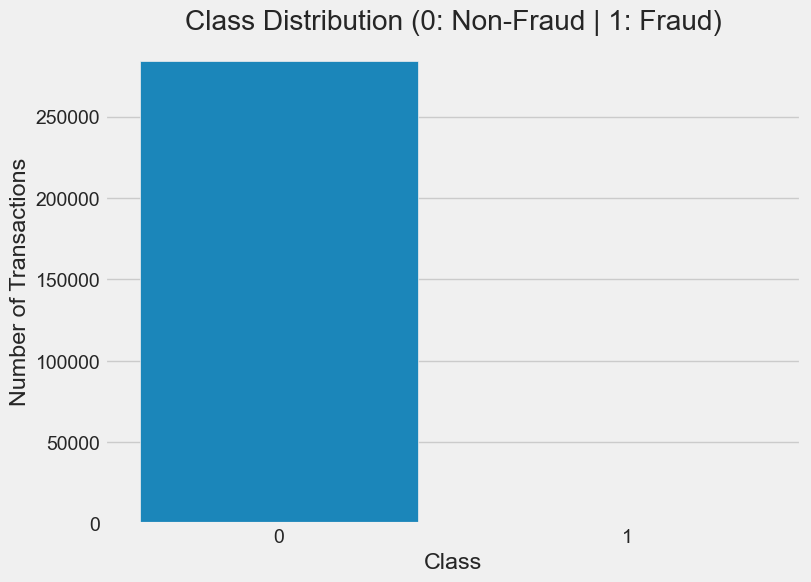


Analyzing 'Time' and 'Amount' features...


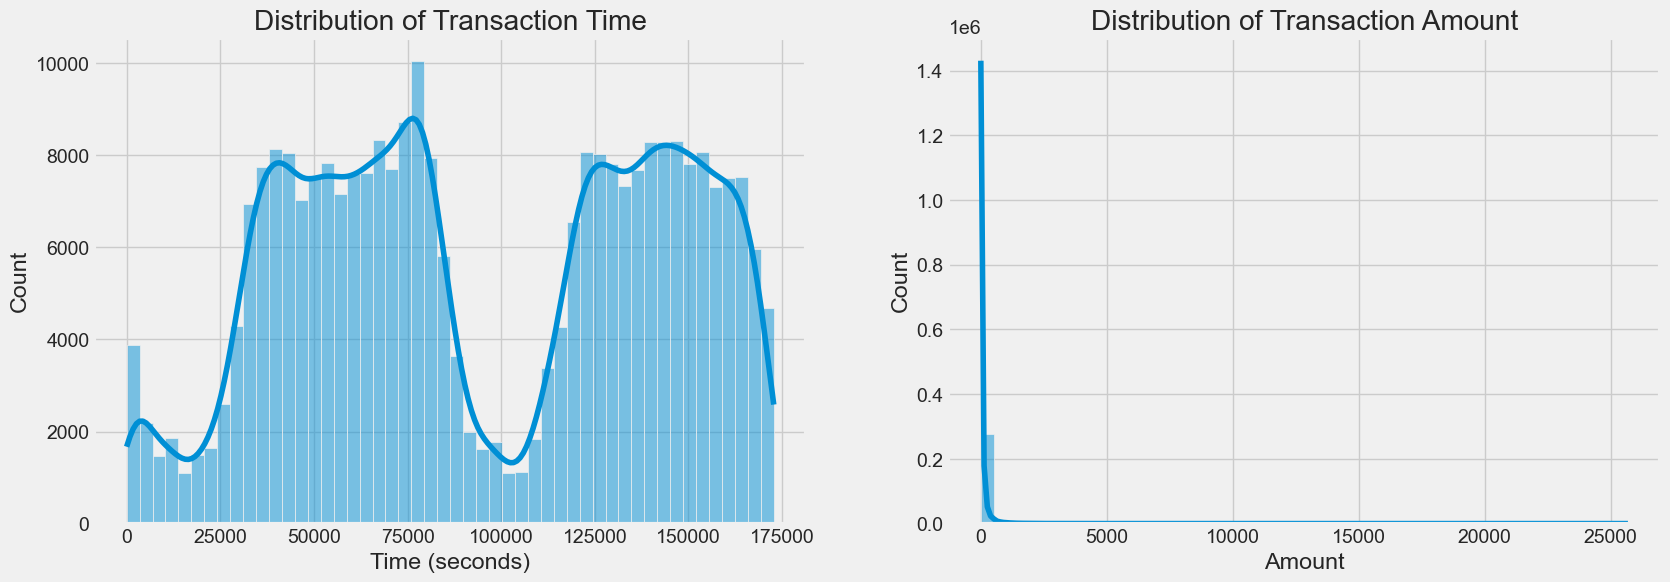


Descriptive statistics for 'Amount':
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

--- Preparing data for modeling ---

Data split successfully.
X_train shape: (227845, 29)
X_test shape: (56962, 29)

Fraud cases in training set: 394 (0.17%)
Fraud cases in test set: 98 (0.17%)

Processed data saved successfully to: ../processed_data/split_data.pkl

This notebook's execution is complete.


In [2]:
# =============================================================================
# 2. LOAD DATA
# =============================================================================
# Define the path to the dataset
DATA_PATH = "../Source/Dataset/archive.zip"

# Load the data into a pandas DataFrame
df = pd.read_csv(DATA_PATH, compression='zip')

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
print("\n--- Starting Exploratory Data Analysis ---")

# --- 3.1. Basic Information and Missing Values ---
print("\nDataset Info:")
df.info()

# Note: The .info() output shows no missing values, which is great.
# The features V1-V28 are already scaled (result of PCA), but 'Time' and 'Amount' are not.

# --- 3.2. Target Variable Analysis (Class Imbalance) ---
# This is the most important step in the EDA for a fraud detection problem.
print("\nAnalyzing class imbalance...")

class_counts = df['Class'].value_counts()
class_counts_perc = df['Class'].value_counts(normalize=True) * 100

print(f"\nClass distribution:\n{class_counts}")
print(f"\nClass distribution (%):\n{class_counts_perc}")

# Visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud | 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

# --- 3.3. 'Amount' and 'Time' Feature Analysis ---
print("\nAnalyzing 'Time' and 'Amount' features...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 'Time'
sns.histplot(df['Time'], bins=50, ax=ax1, kde=True)
ax1.set_title('Distribution of Transaction Time')
ax1.set_xlabel('Time (seconds)')

# Plot for 'Amount'
sns.histplot(df['Amount'], bins=50, ax=ax2, kde=True)
ax2.set_title('Distribution of Transaction Amount')
ax2.set_xlabel('Amount')

plt.show()

print("\nDescriptive statistics for 'Amount':")
print(df['Amount'].describe())

# EDA Finding: 'Amount' is heavily right-skewed. Most transactions are small.
# For many models (like Logistic Regression), scaling this feature would be essential.
# For tree-based models like RandomForest, it's less critical but still good practice.
# For simplicity and to focus on the anonymized features, we can choose to drop 'Time' and scale 'Amount' later if needed.

# =============================================================================
# 4. DATA PREPARATION AND SPLITTING
# =============================================================================
print("\n--- Preparing data for modeling ---")

# For this initial model, we will drop the 'Time' column as it doesn't add immediate value without further context.
# The anonymized 'V' features are already scaled. Let's keep 'Amount' for now.
# Note: In a real-world scenario, we would scale 'Amount' (e.g., with StandardScaler).
# For RandomForest, this is not strictly necessary.

df_model = df.drop('Time', axis=1)

# --- 4.1. Define Features (X) and Target (y) ---
X = df_model.drop('Class', axis=1)
y = df_model['Class']

# --- 4.2. Train-Test Split ---
# We use train_test_split to create our training and testing sets.
# **Crucially**, we use the `stratify=y` parameter to ensure the class imbalance
# is preserved in both the train and test sets. This is non-negotiable for this problem.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"\nFraud cases in training set: {sum(y_train)} ({sum(y_train)/len(y_train)*100:.2f}%)")
print(f"Fraud cases in test set: {sum(y_test)} ({sum(y_test)/len(y_test)*100:.2f}%)")


# =============================================================================
# 5. SAVE PROCESSED DATA FOR NEXT STEPS
# =============================================================================
# To maintain our modular workflow, we will save the split data.
# The next notebook (2_Model_Training) will simply load this file.
# We'll use pickle to save the data in a dictionary.

processed_data = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

# Define a path to save the processed data
# You might want to create a new folder for this
import os
os.makedirs('../processed_data', exist_ok=True)
SAVE_PATH = "../processed_data/split_data.pkl"

with open(SAVE_PATH, 'wb') as file:
    pickle.dump(processed_data, file)

print(f"\nProcessed data saved successfully to: {SAVE_PATH}")
print("\nThis notebook's execution is complete.")